In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# create an empty data frame
names_df = pd.DataFrame(columns=['yob','name','gender','total'])

# loop through the SS name text files
for yob in range(1920,2019):
    # read the data into the import data frame
    import_df = pd.read_csv(f'names/yob{yob}.txt',header=None,names=['name','gender','total'])
    # add the yob column
    import_df['yob'] = yob
    # concat the import data frame to the big data frame
    names_df = pd.concat([names_df,import_df],sort=True)

# once the data has been read in, convert yob and count to int
names_df['total']=names_df['total'].astype(int)
names_df['yob']=names_df['yob'].astype(int)

# this takes a few seconds!

In [4]:
# line plot function
def getPlot(name,gender,center):
    # get a dataframe for just that name and gender
    plot_df = names_df.loc[(names_df['name']==name) & (names_df['gender']==gender) ]
    
    # set the series to plot
    x_axis = plot_df['yob']
    values = plot_df['total']
    # create the plot
    plt.figure(figsize=[15,5])
    plt.plot(x_axis,values,color = 'coral',marker = 'o')
    
    # set the axes limits and ticks
    plt.ylim(0,max(values)*1.05)
    plt.xlim(center-30,center+30)
    plt.xticks(np.arange(center-30,center+30,10))
    # draw a horizontal line at the center
    plt.vlines(center,0,max(values)*1.05, color = 'blue')
    
    # other chart elements
    plt.title(f'Popularity of "{name}" ({gender})')
    plt.ylabel('Count')
    plt.xlabel('Year')
    plt.grid()
    plt.savefig(f'plots/{name}-{gender}.png', dpi=600)

In [5]:
sorted_df = names_df.sort_values(['gender','name'],ascending=[True,True])
grouped_df = sorted_df.groupby(['gender','name'])
pct = grouped_df['total'].pct_change()
sorted_df['pct']=pct


In [6]:
# sorted_df.head(200)
# there is an issue here caused by missing rows where a name had a count of 0 for a given year.
# for pct_change(), we'd have to add the missing rows
# can do this by joining to a dataframe with just a dummy key and the entire range of years.

In [6]:
def getPlot2(name,gender,center):
    # get a dataframe for that year and gender
    plot_df = sorted_df.loc[(sorted_df['yob']==center) & (sorted_df['gender']==gender)]
    plot_df1 = sorted_df.loc[(sorted_df['yob']==center) & (sorted_df['gender']==gender) & (sorted_df['name']==name)]

    # set the series to plot
    x_axis = plot_df['total']
    values = plot_df['pct']
    x_focus = plot_df1['total']
    value_focus = plot_df1['pct']
    
    # create the plot
    plt.figure(figsize=[15,5])
    plot1 = plt.scatter(x_axis,values,color = 'coral',marker = 'o')
    Plot2 = plt.scatter(x_focus,value_focus, color = 'blue',marker = 's')

    # other chart elements
    plt.title(f'Popularity of "{name}" ({gender}) in {center}')
    plt.ylabel('Pct Change from Prior Year')
    plt.xlabel('Count')
    plt.xlim(0,20000)
    plt.grid()
    #plt.savefig(f'plots/{name}-{gender}.png', dpi=600)

In [7]:
filter_df = sorted_df.loc[(sorted_df['total']>3000) & (sorted_df['pct']>3.00)]
print(filter_df)    

      gender     name  total   yob        pct
28         F    Jaime   7837  1976   7.565027
53         F    Jenna   5879  1984   4.033390
68         F   Mariah   5192  1991   3.707162
90         F   Selena   3824  1995   3.170120
106        F    Tammy   4364  1957  15.914729
19914      M  Bentley   3771  2010   6.224138
7633       M   Darrin   3258  1965   3.072500
14633      M    Ethan   4055  1989   3.530726
19329      M     Jase   4552  2013   3.035461
15873      M  Tristan   3088  1995   5.289206


In [9]:
# for x in filter_df.iterrows():
#     getPlot(x[1][1],x[1][0],x[1][3])

In [11]:
name = input('Name? >>> ')
gender = input('Gender? M/F >>> ')
center = int(input('Year? >>> '))

Name? >>> William
Gender? M/F >>> M
Year? >>> 1993


FileNotFoundError: [Errno 2] No such file or directory: 'plots/William-M.png'

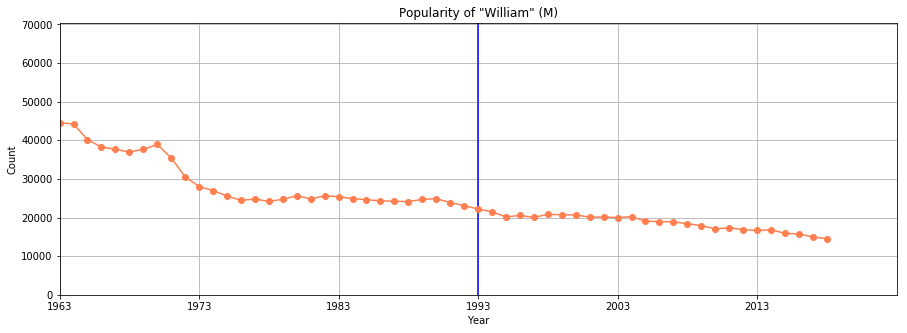

In [12]:
getPlot(name,gender,center)

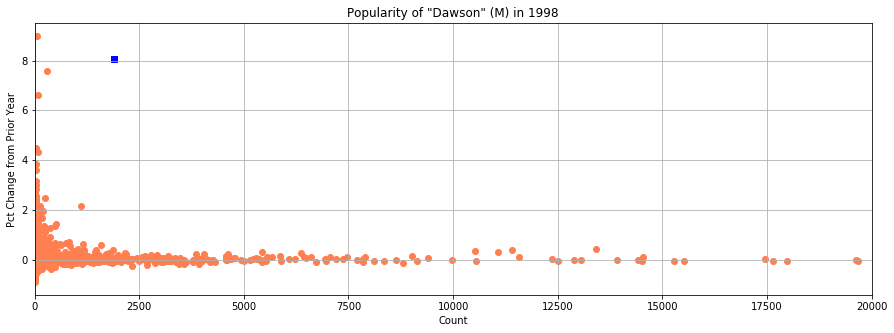

In [12]:
getPlot2(name,gender,center)